# Phase curve analysis of KELT-1b TESS Sectors 17 and 57
## 1. Posterior sampling

**Author:** Hannu Parviainen </br>
**Last updated:** 2 Feb 2023

In [1]:
%run src/init_threading_for_multiprocessing.py

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from multiprocessing import Pool
from pytransit.orbits import epoch, fold
from pytransit.utils.downsample import downsample_time_1d

from src.lpf import KELT1LPF

In [4]:
lpf = KELT1LPF()

In [5]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.1628, σ = 0.01)            [    -inf ..      inf],
   1 |G| p              N(μ = 1.217513, σ = 4.5e-05)             [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.5392592032228568, σ = 0.07529312598667542) [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.006084, σ = 0.001)               [    0.00 ..      inf],
   7 |G| oev            N(μ = 0.0, σ = 0.09)                     [    -inf ..      inf],
   8 |G| aev_T17        U(a = 0.0, b = 0.001)                    [    0.00 ..      inf],
   9 |G| adb_T17        U(a = 0, b = 1)                          [    0.00 ..      inf],
  10 |G| log10_ted_T17  U(a = -3.0, b = 0.0)                     [    -inf ..      inf],
  11 |G| lo

In [6]:
def lnpost(pv):
    return lpf.lnposterior(pv)

In [7]:
pool = Pool(16)

Global optimisation:   0%|          | 0/500 [00:00<?, ?it/s]

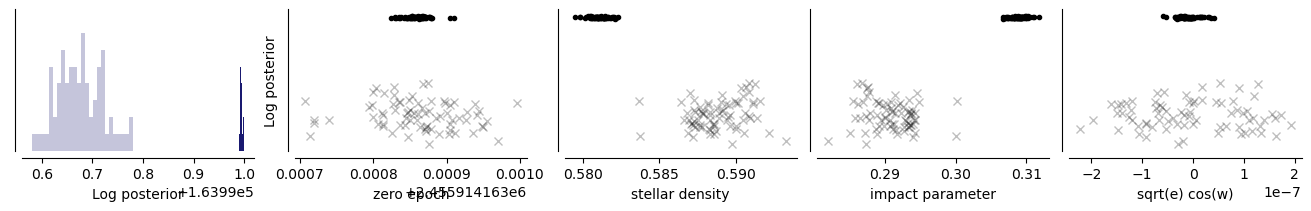

In [14]:
lpf.optimize_global(2500, 75, lnpost=lnpost, vectorize=False, pool=pool)

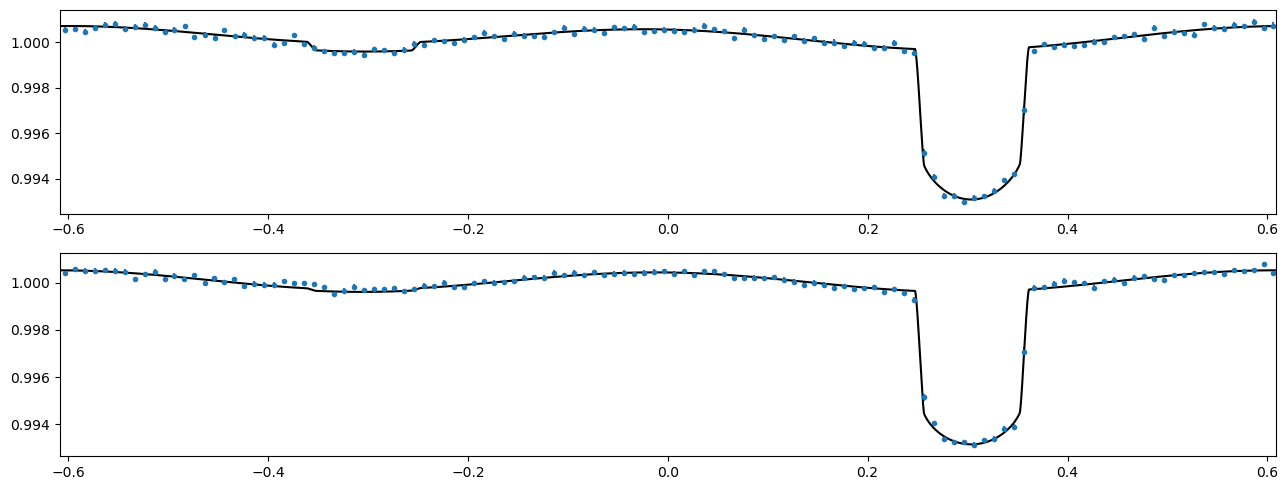

In [15]:
pv = lpf.de.minimum_location
fm = lpf.flux_model(pv)

fig, axs = subplots(2, 1, figsize=(13,5))

for i,sl in enumerate(lpf.lcslices):
    ax = axs[i]
    bl = lpf._lnlikelihood_models[0].predict_baseline(pv)
    phase = fold(lpf.timea[sl], pv[1], pv[0], 0.25)
    sids = argsort(phase)
    phase = phase[sids]

    pb, fb, eb = downsample_time_1d(phase, lpf.ofluxa[sl][sids] - bl[sl][sids] + 1, 0.01)

    ax.errorbar(pb, fb, eb, fmt='.')
    ax.plot(phase, fm[sl][sids], 'k')
    ax.autoscale(axis='x', tight=True)

fig.tight_layout()

In [16]:
lpf.sample_mcmc(5000, thin=100, repeats=5, save=True, lnpost=lnpost, vectorize=False, pool=pool)

MCMC sampling:   0%|          | 0/5 [00:00<?, ?it/s]

Run 1/5:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/5:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/5:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 4/5:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 5/5:   0%|          | 0/5000 [00:00<?, ?it/s]

---

<center>&copy;2023 Hannu Parviainen</center>